# Import Library

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

# Read data

In [2]:
df = pd.read_csv("/kaggle/input/loan-prediction-based-on-customer-behavior/Training Data.csv")

# Sample Of Data

In [3]:
df.sample(10)

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
190587,190588,5674867,69,4,single,rented,yes,Firefighter,Jamnagar,Gujarat,3,10,0
201938,201939,8934196,51,18,single,owned,no,Chemical_engineer,Kumbakonam,Tamil_Nadu,3,10,0
73293,73294,6758342,33,3,single,rented,no,Comedian,Patiala,Punjab,3,11,0
220450,220451,1389454,32,16,single,rented,no,Surgeon,Udaipur,Rajasthan,3,12,0
173195,173196,4614035,42,15,single,rented,no,Flight_attendant,Miryalaguda,Telangana,13,14,0
170235,170236,6913338,61,16,single,rented,yes,Consultant,Satara,Maharashtra,11,14,0
94273,94274,6543823,50,5,single,rented,yes,Geologist,Kurnool[18],Andhra_Pradesh,5,13,0
223471,223472,4581648,35,17,single,rented,yes,Industrial_Engineer,Chapra,Bihar,3,13,1
41124,41125,8800769,29,4,single,rented,no,Microbiologist,Vasai-Virar,Maharashtra,4,12,1
251859,251860,6775467,41,13,single,rented,no,Petroleum_Engineer,Ongole,Andhra_Pradesh,8,10,0


# Data Information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


# Check Null Values In Data

In [5]:
df.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

# Data Describe

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,252000.0,1.260005e+05,7.274628e+04,1.0,63000.75,126000.5,189000.25,252000.0
Income,252000.0,4.997117e+06,2.878311e+06,10310.0,2503015.00,5000694.5,7477502.00,9999938.0
Age,252000.0,4.995407e+01,1.706385e+01,21.0,35.00,50.0,65.00,79.0
Experience,252000.0,1.008444e+01,6.002590e+00,0.0,5.00,10.0,15.00,20.0
CURRENT_JOB_YRS,252000.0,6.333877e+00,3.647053e+00,0.0,3.00,6.0,9.00,14.0
CURRENT_HOUSE_YRS,252000.0,1.199779e+01,1.399037e+00,10.0,11.00,12.0,13.00,14.0
Risk_Flag,252000.0,1.230000e-01,3.284379e-01,0.0,0.00,0.0,0.00,1.0


# Check Number Of Unique Value In Each Columns

In [7]:
for i in df.columns:
    print(i,":",df[i].nunique())

Id : 252000
Income : 41920
Age : 59
Experience : 21
Married/Single : 2
House_Ownership : 3
Car_Ownership : 2
Profession : 51
CITY : 317
STATE : 29
CURRENT_JOB_YRS : 15
CURRENT_HOUSE_YRS : 5
Risk_Flag : 2


# Drop Id Column

In [8]:
df.drop('Id',axis = 1,inplace = True)

# Store categorical Columns In One variable

In [9]:
cat_col = ['Married/Single','House_Ownership', 'Car_Ownership', 'Profession','CITY','STATE',
       'CURRENT_JOB_YRS']

# Perform EDA

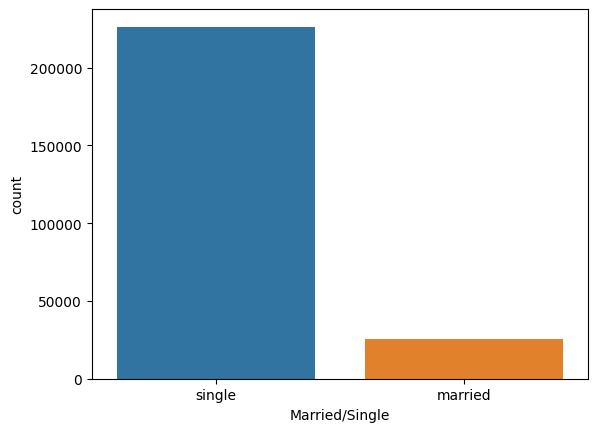

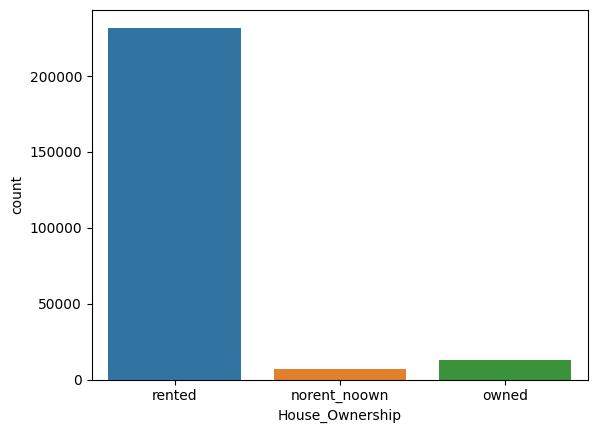

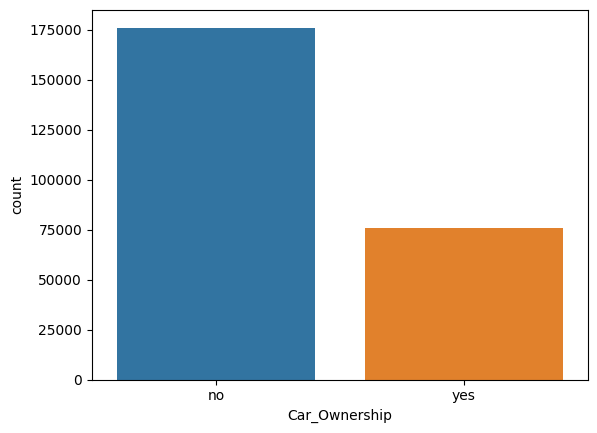

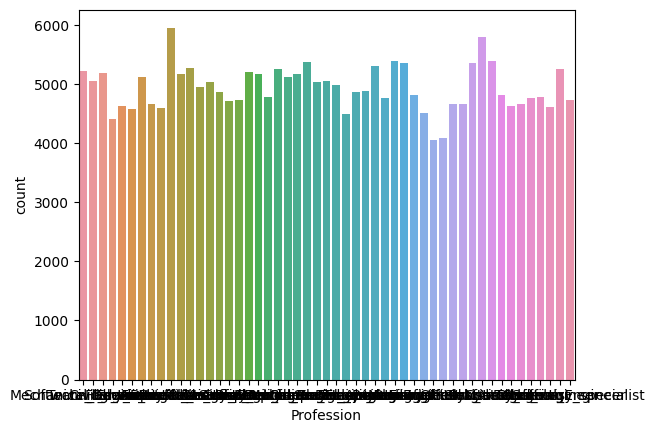

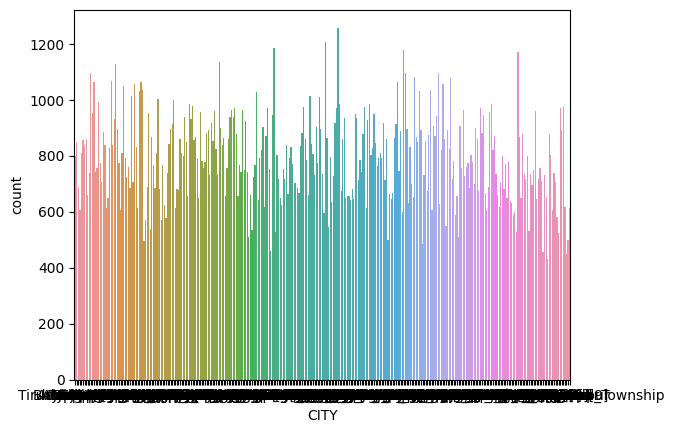

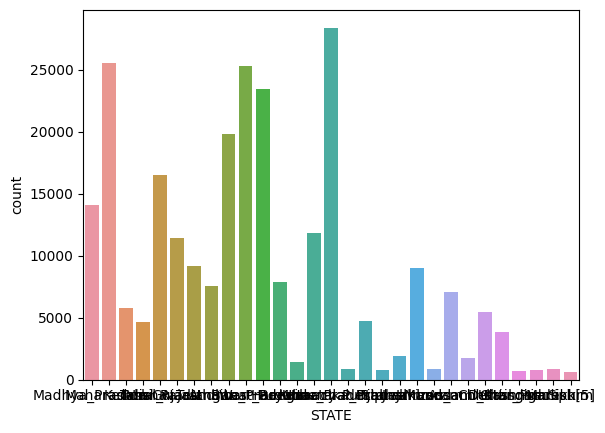

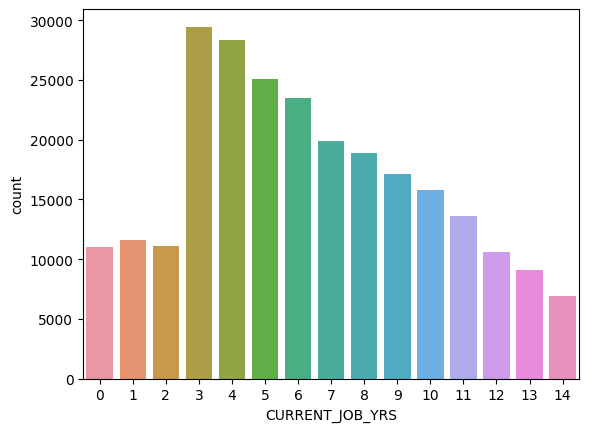

<Figure size 640x480 with 0 Axes>

In [10]:
for i in cat_col:
    sns.countplot(x = i,data = df)
    plt.show()
    plt.tight_layout()

<Axes: xlabel='Risk_Flag', ylabel='count'>

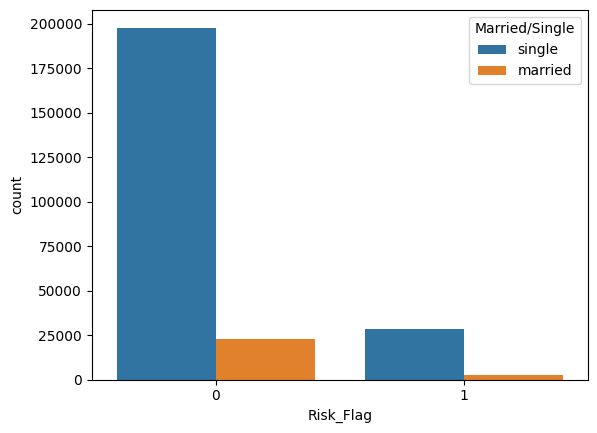

In [11]:
sns.countplot(x = 'Risk_Flag',data = df, hue = 'Married/Single')

# Check Outliers In Income And Age

<Axes: xlabel='Income'>

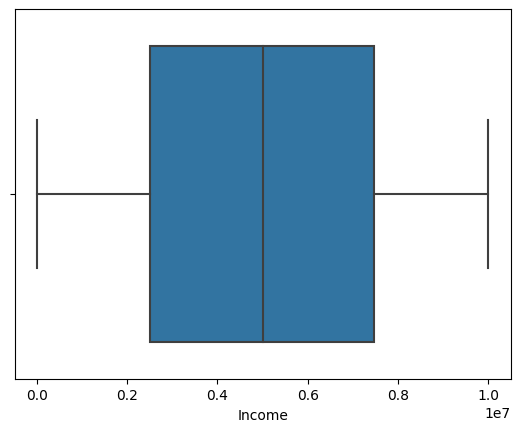

In [12]:
sns.boxplot(x = 'Income', data = df)

<Axes: xlabel='Age'>

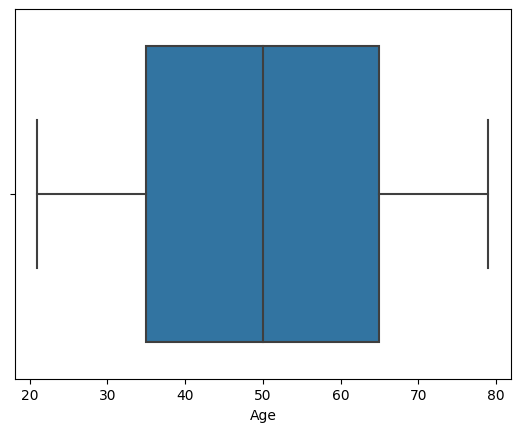

In [13]:
sns.boxplot(x = 'Age', data = df)

<Axes: xlabel='Income', ylabel='Count'>

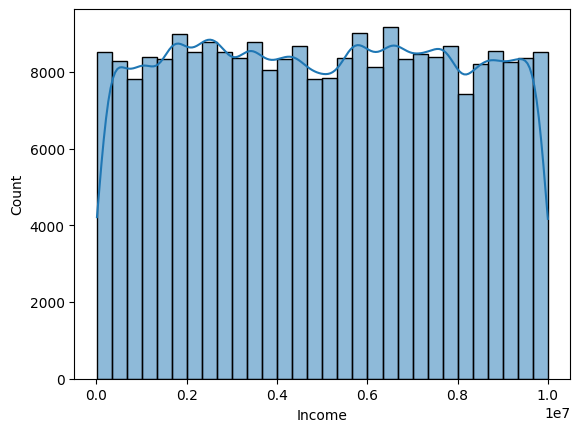

In [14]:
sns.histplot(x = 'Income', data = df,kde=True,bins = 30)

#  Preprocessing Step In Machine Learning. 

# Converting categorical columns to numerical columns

In [15]:
en = LabelEncoder()
for i in cat_col:
    df[i] = en.fit_transform(df[i])

In [16]:
df

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,1,2,0,33,251,13,3,13,0
1,7574516,40,10,1,2,0,43,227,14,9,13,0
2,3991815,66,4,0,2,0,47,8,12,4,10,0
3,6256451,41,2,1,2,1,43,54,17,2,12,1
4,5768871,47,11,1,2,0,11,296,22,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...
251995,8154883,43,13,1,2,0,45,162,28,6,11,0
251996,2843572,26,10,1,2,0,3,251,13,6,11,0
251997,4522448,46,7,1,2,0,17,144,14,7,12,0
251998,6507128,45,0,1,2,0,27,233,18,0,10,0


# X contains your input features, and y contains your target variable

In [17]:
x = df.drop('Risk_Flag',axis = 1)
y = df['Risk_Flag']

# To check if your target column is balanced or not

In [18]:
y.value_counts()

Risk_Flag
0    221004
1     30996
Name: count, dtype: int64

# Not Balanced

<Axes: ylabel='count'>

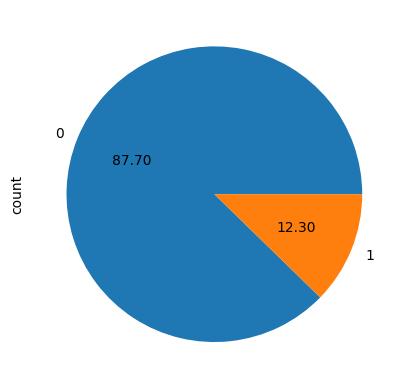

In [19]:
y.value_counts().plot.pie(autopct = '%.2f')

# Balancing the target column 

In [20]:
ros = RandomOverSampler()

In [21]:
x,y = ros.fit_resample(x,y)

In [22]:
y.value_counts()

Risk_Flag
0    221004
1    221004
Name: count, dtype: int64

<Axes: ylabel='count'>

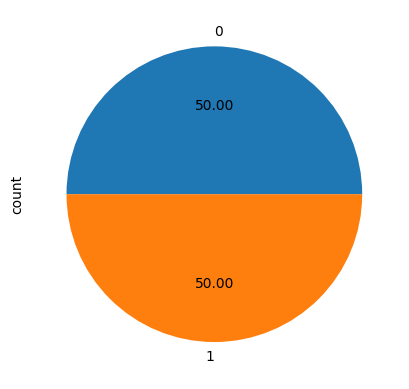

In [23]:
y.value_counts().plot.pie(autopct = '%.2f')

# Standardize the features of a dataset

In [24]:
ss = StandardScaler()
x = ss.fit_transform(x)

# Split data into training and testing sets

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# Creating an instance of the RandomForestClassifier

In [26]:
rfc = RandomForestClassifier(max_depth=100,random_state=100)

# Train the RandomForestClassifier on the training data And Make predictions on the test data


In [27]:
rfc.fit(x_train,y_train)
predict = rfc.predict(x_test)

# Confusion Matrix

In [28]:
print(confusion_matrix(y_test,predict))

[[40571  3752]
 [    8 44071]]


# Classification Report

In [29]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96     44323
           1       0.92      1.00      0.96     44079

    accuracy                           0.96     88402
   macro avg       0.96      0.96      0.96     88402
weighted avg       0.96      0.96      0.96     88402

